Requirements:
- pandas
- openpyxl
- xlrd
- matplotlib

In [1]:
import pandas as pd

Merge all the monthly RDA reports.

In [14]:
directory = '/home/sergio/Documents/Telmex/Productividad/Data/2020/rda/'
file_prefix = 'rdat_metro'

df = pd.DataFrame()

import os
rda_files = []
columns = []
for f in os.listdir(directory):
    if f.startswith(file_prefix):
        df_tmp = pd.read_excel(directory + f, sheet_name='base')
        #print(f, '-', df_tmp.shape)
        columns.append(df_tmp.columns)
        df = df.append(df_tmp)
        
#print(df.shape)

In [16]:
import operator
from functools import reduce

for l in columns:
    print(len(l))

46
46
47
46
46
46
46
46
46
46
46
46


In [20]:
for x in columns[0]:
    print(x)

ID
SITIO
SERVICIO
CENTRAL
CATENCIO
CMANTENI
CTGOM
SERV
CLIENTE
SEMANA
division
DOMICILIOA
DOMICILIOB
EST_N
FECHATLMI
HORATLMI
FECHACTEI
HORACTEI
FECHATLMF
HORATLMF
FECHA_REAL
HORA_REAL
DURACTE
DURAREP
DURATLM
QUEJA_PBA
FALLAENC
FOLIOF
FOLIOQ
COD01
COD02
COD03
COD04
COD05
FOL_SER
TEC_ASIG
TEC_CIERRA
cto_x_sent
ONTIME
CODIGO
t_1a_oin_c
tipo_cliente
Entiempo_tipocte
centro_atendio
entidad_ctro_atendio
INX


Pick just the ones related to CM_AB

In [7]:
ab = df[df['CMANTENI'] == 'CMABS']
print('Shape:', ab.shape)


Shape: (59, 47)


Split columns by type

In [8]:
#print(ab.dtypes)
date_cols = ab.select_dtypes('datetime')
int_cols = ab.select_dtypes('number')
obj_cols = ab.select_dtypes(object)
#print(date_cols.shape)
#print(int_cols.shape)
#print(obj_cols.shape)

# Numeric data
Maybe a describe is good enough.

In [9]:
int_cols.describe()

,DURACTE,DURAREP,DURATLM,FOLIOF,FOLIOQ,COD01,COD02,COD03,COD04,COD05,FOL_SER,t_1a_oin_c
count,59.000000,59.000000,59.000000,5.900000e+01,5.900000e+01,59.000000,59.000000,59.000000,59.000000,59.000000,5.900000e+01,13.000000
mean,7.253898,5.383616,4.097288,7.774687e+06,7.774687e+06,3.830508,2.864407,37.000000,22.474576,108.050847,2.872967e+06,0.230769
std,14.713947,13.654527,13.423777,1.497005e+05,1.497005e+05,0.647343,0.433813,99.687616,13.378258,1.995026,1.025103e+07,0.832050
min,0.390000,0.100000,0.040000,7.592964e+06,7.592964e+06,1.000000,1.000000,2.000000,5.000000,103.000000,5.700850e+05,0.000000
25%,1.390000,1.141666,0.260000,7.654148e+06,7.654148e+06,4.000000,3.000000,6.000000,11.500000,109.000000,1.375872e+06,0.000000
50%,2.280000,2.066666,1.200000,7.718632e+06,7.718632e+06,4.000000,3.000000,17.000000,28.000000,109.000000,1.635771e+06,0.000000
75%,4.745000,3.000000,2.580000,7.869740e+06,7.869740e+06,4.000000,3.000000,17.000000,28.500000,109.000000,1.823738e+06,0.000000
max,91.920000,91.916666,91.920000,8.068634e+06,8.068634e+06,4.000000,3.000000,463.000000,65.000000,110.000000,8.023635e+07,3.000000



# Date data

In [10]:
#dated_df = ab.append( date_cols['FECHA_REAL'].dt.month)
months = date_cols['FECHA_REAL'].dt.month

In [11]:
ab_MONTH = ab.join(months, rsuffix='_MONTH')

In [12]:
ab_MONTH[['FECHA_REAL', 'FECHA_REAL_MONTH']]

,FECHA_REAL,FECHA_REAL_MONTH
2,2020-03-15,3
8,2020-09-21,9
9,2020-08-31,8
13,2020-08-02,8
18,2020-03-14,3
...,...,...
505,2020-02-01,2
510,2020-04-06,4
537,2020-12-03,12
538,2020-05-28,5


In [9]:
ab

,ID,SITIO,SERVICIO,CENTRAL,CATENCIO,CMANTENI,CTGOM,SERV,CLIENTE,SEMANA,...,ONTIME,CODIGO,t_1a_oin_c,tipo_cliente,Entiempo_tipocte,centro_atendio,entidad_ctro_atendio,INX,Unnamed: 46,MONTH
2,A01-0608-0552,MEXOET,DS0,ES_,CASMEX,CMABS,CMABS,DS0,UNINET,Telmex Planta Interna,...,N,UECMABS1,NaN,M,N,CASMEX,CACXCASM,NaN,NaN,3
18,A01-1307-0165,MEXOET,DS0,ES_,CASCAF,CMABS,CMABS,DS0,UNINET,Telmex Planta Interna,...,S,UECMABS1,NaN,NaN,S,CASCAF,NaN,NaN,NaN,3
20,A01-1310-0236,MEXOET,DS0,ES_,CASCAF,CMABS,CMABS,DS0,UNINET,Telmex Planta Interna,...,S,UECMABS1,NaN,NaN,S,CASCAF,NaN,NaN,NaN,3
132,A32-1512-0152,MEXOET,E1,ES_,CASCAF,CMABS,CMABS,E1,UNINET,Telmex Planta Interna,...,S,UECMABS1,NaN,NaN,S,CASCAF,NaN,NaN,NaN,3
149,A32-1709-0028,MEXOET,E1,ES_,CASCAF,CMABS,CMABS,E1,UNINET,Telmex Planta Interna,...,S,UECMABS1,NaN,NaN,S,CASCAF,NaN,NaN,NaN,3
255,D32-0801-1097,MEXOET,E1,ES_,CASMEX,CMABS,CMABS,E1,UNINET,Telmex Planta Interna,...,S,UECMABS1,NaN,M,S,CASMEX,CACXCASM,NaN,NaN,3
361,FB2-1108-0229,MEXOET,ETRN,AB_,CASMEX,CMABS,CMABS,FUT,GOBIERNO DEL DISTRITO FEDERAL CD SEGU,Telmex Planta Interna,...,N,UECMABS1,NaN,M,N,CASMEX,CACXCASM,NaN,NaN,3
392,LD1-1010-0004,MEXOET,TKD,AB_,CASMEX,CMABS,CMABS,E1,DISTRIBUIDORA ALIMENTICIA PARA HOTELES,Telmex Planta Interna,...,N,UECMABS1,NaN,M,N,CASMEX,CACXCASM,NaN,NaN,3
88,A06-1106-0056,MEXOET,AXX,IK_,CAO,CMABS,CMABS,DS0,AXTEL S.A.B. de C.V.,Telmex Planta Interna,...,S,UECMABS1,NaN,P,N,CAO,CACXCAO1,NaN,NaN,1
300,D32-1306-0368,MEXOET,E1,ES_,CAO,CMABS,CMABS,E1,AXTEL S.A.B. de C.V.,Telmex Planta Interna,...,N,UECMABS1,NaN,P,N,CAO,CACXCAO1,NaN,NaN,1


----
### Count by days

In [20]:
instances_by_day = ab['FECHA_REAL'].dt.floor('d').value_counts()

In [37]:
y = df['FECHA_REAL'].dt.year
m = df['FECHA_REAL'].dt.month

instances_by_day = df.groupby([m])['FECHA_REAL'].transform('size')


In [50]:
instances_by_day = df['FECHA_REAL'].groupby([df.FECHA_REAL.dt.year, df.FECHA_REAL.dt.month]).agg('count')

In [56]:
instances_by_day.index.to_series().apply(lambda x: '{0}-{1}'.format(*x))

FECHA_REAL  FECHA_REAL
2020        1              2020-1
            2              2020-2
            3              2020-3
            4              2020-4
            5              2020-5
            6              2020-6
            7              2020-7
            8              2020-8
            9              2020-9
            10            2020-10
            11            2020-11
            12            2020-12
dtype: object

---
## Plotting incidents by date

In [29]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

<BarContainer object of 41 artists>

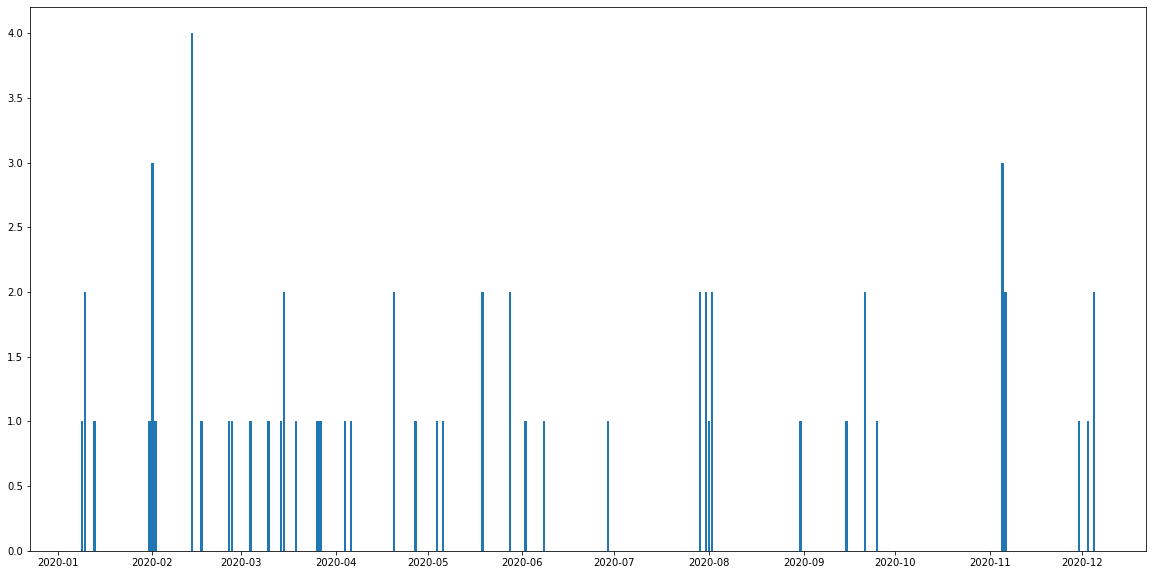

In [52]:
fig, ax = plt.subplots()
ax.bar(instances_by_day.index, instances_by_day.values)

### Making it smoother
This gets complicated, because to make it smoother, a model needs to be found so that it 'emulates' the points with a softer line.

In [84]:
instances_by_day.head(15)

2020-01-09    1
2020-01-10    2
2020-01-13    1
2020-01-31    1
2020-02-01    3
2020-02-02    1
2020-02-14    4
2020-02-17    1
2020-02-26    1
2020-02-27    1
2020-03-04    1
2020-03-10    1
2020-03-14    1
2020-03-15    2
2020-03-19    1
Name: FECHA_REAL, dtype: int64

In [85]:
# the index needs to be changed, first approach: date = month + day
#instances_by_day['date'] = 

dates = []
for m, d in zip(instances_by_day.index.month, instances_by_day.index.day):
    dates.append(f'{m:02}{d:02}')
dates_df = pd.DataFrame({'fecha': dates})
dates_df['ocurrencias'] = instances_by_day.values


In [86]:
dates_df

,fecha,ocurrencias
0,0109,1
1,0110,2
2,0113,1
3,0131,1
4,0201,3
5,0202,1
6,0214,4
7,0217,1
8,0226,1
9,0227,1


<BarContainer object of 41 artists>

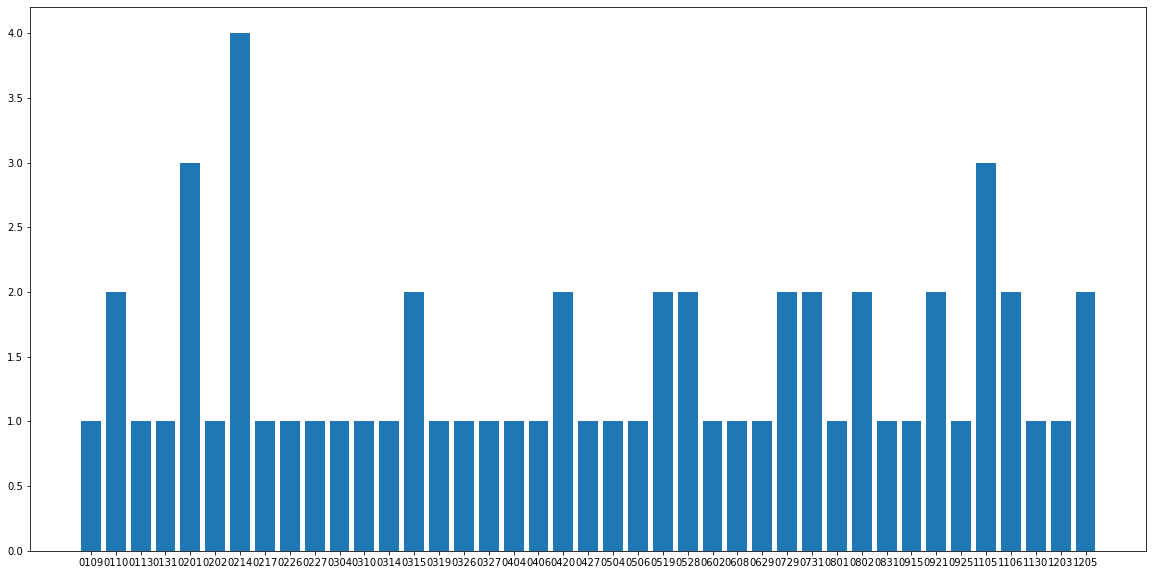

In [87]:
fig, ax = plt.subplots()
ax.bar(dates_df['fecha'], dates_df['ocurrencias'])

# In the previous plot there are missing all dates with no instances. All of those days in a year will have 0 as value for the plot.

In [ ]:
ab[['ID', 'SITIO']].nunique()

In [ ]:
ab['ID'].nunique()

In [ ]:
ab.nunique()

In [ ]:
ab['ID'].value_counts()

In [ ]:
ab[['SITIO']].value_counts()

In [ ]:
for col in ab.columns:
    print(ab[col].value_counts())
    print('-' * 30)